In [11]:
import numpy as np
#from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#import matplotlib.style
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]

In [2]:
a=3.2
b=0.5
x = np.linspace(0,10,202)

mean = 0
std = 1 
num_samples = len(x)
np.random.seed(784659321) # in case you want repeatability of results
noise = np.random.normal(mean, std, size=num_samples)

y = a*x +b +noise

In [3]:
reg_x=x.reshape(len(x),1) #linear regression model expects a 2D matrix
reg_y=y.reshape(len(y),1) #linear regression model expects a 2D matrix
model = LinearRegression()
model.fit(reg_x,reg_y)
pred_y = model.predict(reg_x)

In [4]:
print(r2_score(reg_y, pred_y))
print(model.score(reg_x,reg_y))#the score method of the linear regression model returns R^2

0.9894295509298212
0.9894295509298212


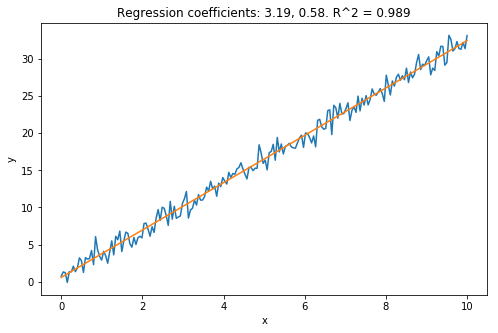

In [12]:
#fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x,y)
plt.plot(reg_x,pred_y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Regression coefficients: {:.2f}, {:.2f}. R^2 = {:.3f}'
             .format(model.coef_[0][0],model.intercept_[0],r2_score(reg_y, pred_y)))

#plt.savefig('regression')
plt.show()

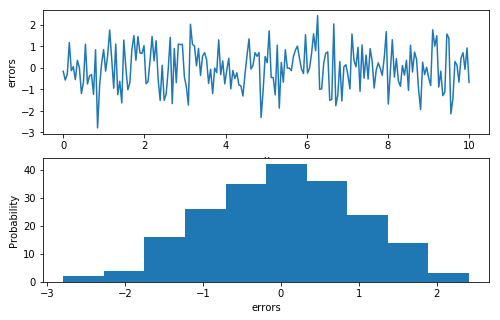

In [13]:
plt.subplot(2, 1, 1)
plt.plot(reg_x,pred_y-reg_y)
plt.ylabel('errors')
plt.xlabel('x')
plt.subplot(2, 1, 2)
bins=10 #default is 10
plt.hist(pred_y-reg_y,bins)
plt.xlabel('errors')
plt.ylabel('Probability')

#plt.savefig('errors')
plt.show()

### Test if errors are normally distributed (Shapiro–Wilk test)
(null hypothesis **H_0**: the data is drawn from a normal distribution)


In [7]:
from scipy import stats
test=stats.shapiro(pred_y-reg_y)
print('test statistic = {:.3f}, p-value = {:.3f}'.format(test[0],test[1]))

test statistic = 0.996, p-value = 0.854


In [8]:
#for comparison, testing normally-distributed random numbers:
stats.shapiro(stats.norm.rvs(size=200))

(0.990818977355957, 0.23459571599960327)

### Kolmogorov–Smirnov test

In [9]:
test=stats.kstest(pred_y-reg_y, 'norm')
print('test statistic = {:.3f}, p-value = {:.3f}'.format(test[0],test[1]))

test statistic = 0.997, p-value = 0.000


In [10]:
#for comparison, testing normally-distributed random numbers:
stats.kstest(stats.norm.rvs(size=200), 'norm')

KstestResult(statistic=0.0397965827179772, pvalue=0.9093793502430065)